# 

# 

# Census Income

### Project Objective:

The project's main objective is to predict whether an individual's annual income exceeds 50,000 dollar based on data from the 1994 Census Bureau database. To achieve this, a dataset with reasonably clean records was extracted, following specific conditions such as age greater than 16, an adjusted gross income over 100 dollar, and positive working hours. The dataset includes a "final weight" (fnlwgt) attribute, which represents the weighting applied to the data to match independent estimates of the US civilian population. These estimates are based on factors like state, Hispanic origin, race, age, and sex. By building a predictive model, the project aims to help identify individuals with incomes exceeding 50,000 dollar, which can have implications for various socioeconomic analyses and decision-making processes.

# 

# 

## Importing Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

# 

## Importing Data

In [2]:
df = pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 

## EDA

In [3]:
df.shape

(32560, 15)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Checking Unique values

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Column: Workclass
Unique Values: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column: Fnlwgt
Unique Values: [ 83311 215646 234721 ...  34066  84661 257302]


Column: Education
Unique Values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Column: Education_num
Unique Values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column: Marital_status
Unique Values: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Column: Occupation
Unique Valu

### Dropping columns that have irrelevent data

In [7]:
df.drop(['Fnlwgt'], axis=1,inplace=True)
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.dtypes

Age                int64
Workclass         object
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# 

# 

## Imputation

In [11]:
categorical_df = df.select_dtypes(include=['object', 'category']).copy()
categorical_df.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [12]:
for column in categorical_df.columns:
    value_count = df[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: Workclass
Unique Values:  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Column: Education
Unique Values:  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


Column: Marital_status
Unique Values:  Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           

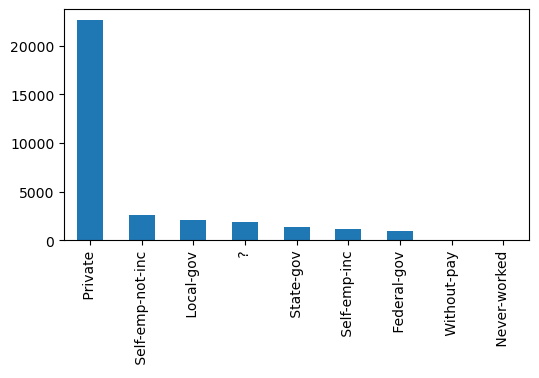

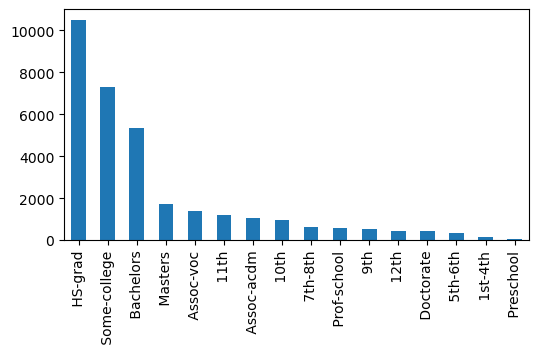

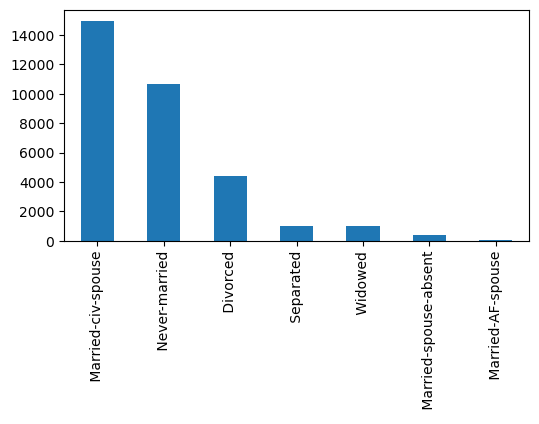

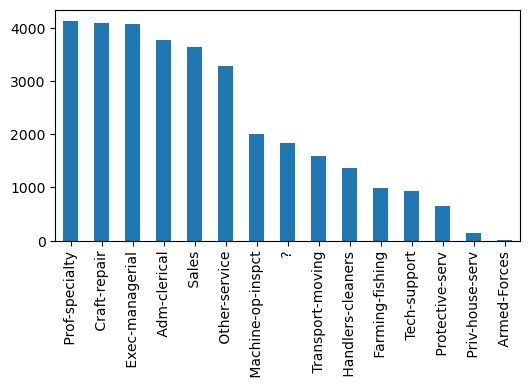

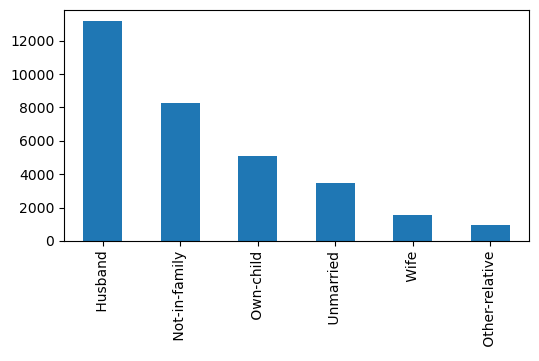

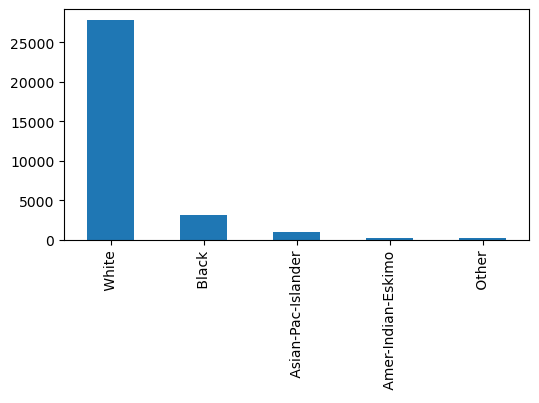

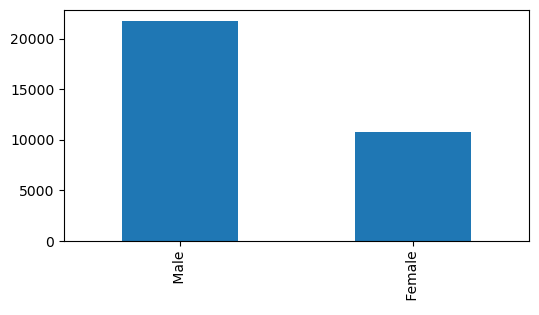

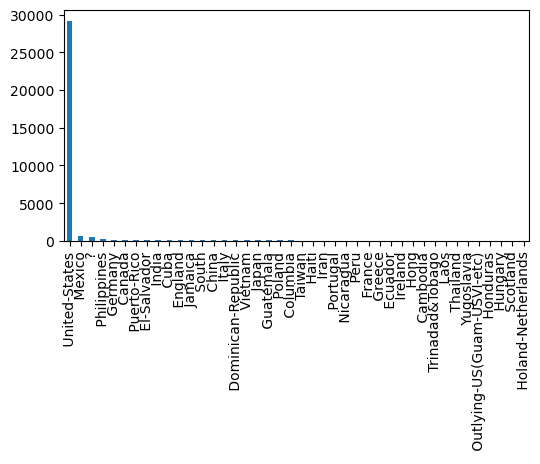

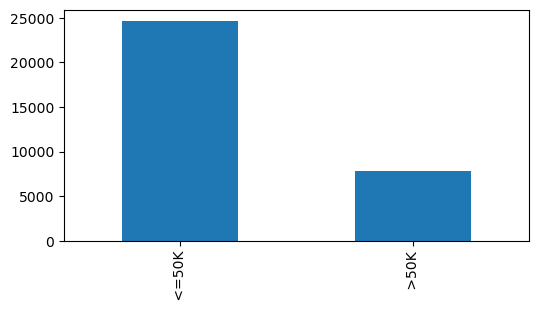

In [13]:
for column in categorical_df.columns:
    plt.figure(figsize=(6, 3))
    df[column].value_counts().plot.bar()

In [14]:
categorical_df.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

### Finding Columns with '?'

In [15]:
columns_with_question_mark = df.applymap(lambda x: '?' in str(x)).any()

columns_with_question_mark = columns_with_question_mark[columns_with_question_mark].index.tolist()
columns_with_question_mark

['Workclass', 'Occupation', 'Native_country']

### Creating Dataframe with Columns with '?'

In [16]:
new_df = df[columns_with_question_mark].copy()
new_df.head()

,Workclass,Occupation,Native_country
0,Self-emp-not-inc,Exec-managerial,United-States
1,Private,Handlers-cleaners,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Prof-specialty,Cuba
4,Private,Exec-managerial,United-States


### Checking Unique Values of columns having '?'

In [17]:
new_df.columns

Index(['Workclass', 'Occupation', 'Native_country'], dtype='object')

In [18]:
for column in new_df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Workclass
Unique Values: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column: Occupation
Unique Values: [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']


Column: Native_country
Unique Values: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlan

### Replacing ' ?' with NaN values

In [19]:
for column in new_df.columns:
    df[column]=df[column].replace(' ?', np.nan)

### Analyzing Null values

In [20]:
df.isnull().sum()

Age                  0
Workclass         1836
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

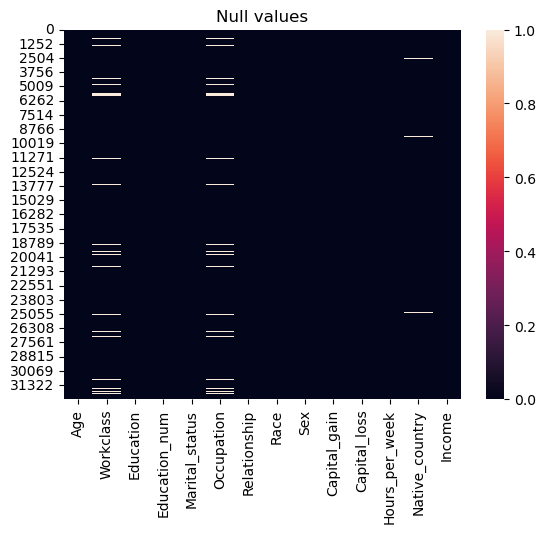

In [21]:
sns.heatmap(df.isnull()) 
plt.title("Null values")
plt.show()

In [22]:
for columns in new_df.columns:
    counts = df[columns].isnull().mean()
    print(f'Columns:{columns}')
    print(f'Null values:{counts}')
    print('\n')

Columns:Workclass
Null values:0.05642980083599705


Columns:Occupation
Null values:0.0566449471354807


Columns:Native_country
Null values:0.017887878042783377




### Replacing Null values with Major value

In [23]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer(strategy='most_frequent')

In [24]:
for column in categorical_df:
    df[column] = mode_imp.fit_transform(df[[column]])

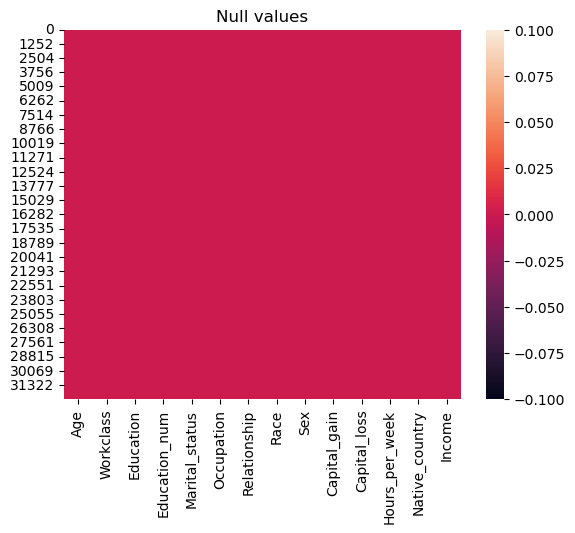

In [25]:
sns.heatmap(df.isnull()) 
plt.title("Null values")
plt.show()

In [26]:
df.isnull().sum().sum()

0

# 

# 

## Encoding

In [27]:
dt=df.copy()
dt.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
dt.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

### Encoding Target values

In [29]:
dt['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [30]:
dt['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [31]:
dt['Income']=dt['Income'].replace(' >50K', 1)
dt['Income']=dt['Income'].replace(' <=50K', 0)

### Checking Value counts of Categorical Columns

In [32]:
encode_columns = dt.select_dtypes(include=['object']).copy()

In [33]:
for column in encode_columns.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: Workclass
Unique Values:  Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Column: Education
Unique Values:  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


Column: Marital_status
Unique Values:  Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dt

### Encoding Categorical Values

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
#encode_columns = dt.select_dtypes(include=['object'])
for column in encode_columns:
    dt[column] = le.fit_transform(dt[column])

### Checking Value counts of Categorical Columns

In [36]:
for column in encode_columns.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: Workclass
Unique Values: 3    24509
5     2540
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: Workclass, dtype: int64


Column: Education
Unique Values: 11    10494
15     7282
9      5352
12     1722
8      1382
1      1175
7      1067
0       933
5       645
14      576
6       514
2       433
10      413
4       332
3       166
13       50
Name: Education, dtype: int64


Column: Marital_status
Unique Values: 2    14970
4    10666
0     4441
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64


Column: Occupation
Unique Values: 9     5979
2     4094
3     4065
0     3767
11    3650
7     3291
6     2000
13    1597
5     1369
4      992
12     927
10     649
8      147
1        9
Name: Occupation, dtype: int64


Column: Relationship
Unique Values: 0    13187
1     8291
3     5064
4     3445
5     1568
2      981
Name: Relationship, dtype: int64


Column: Race
Unique Values: 4    27794
2     3122
1     1038
0      311
3      2

In [37]:
dt.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,12,14,2,3,5,4,0,0,0,40,38,0


# 

# 

## Feature Selection

In [38]:
dt.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [39]:
dt.shape

(32536, 14)

### Checking Contribution Score

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
x = dt.drop(columns = ['Income'])
y = dt['Income']

In [42]:
best_features = SelectKBest(score_func=f_classif, k=13)

fit = best_features.fit(x,y)

dt_scores = pd.DataFrame(fit.scores_) 
dt_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([dt_columns, dt_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(13, 'Score'))

      Feature_Name        Score
3    Education_num  4120.959861
6     Relationship  2186.644675
0              Age  1885.286977
11  Hours_per_week  1811.486632
9     Capital_gain  1708.021444
8              Sex  1591.944711
4   Marital_status  1344.129315
10    Capital_loss   753.959104
2        Education   206.203986
7             Race   168.848540
5       Occupation    38.747732
12  Native_country    17.007549
1        Workclass     0.245588


In [43]:
dt.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

### Dropping Feature Columns with very Low contribution score

In [44]:
dt = dt.drop(columns=['Workclass','Native_country','Race','Occupation','Education'])
dt.head()

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,13,2,0,1,0,0,13,0
1,38,9,0,1,1,0,0,40,0
2,53,7,2,0,1,0,0,40,0
3,28,13,2,5,0,0,0,40,0
4,37,14,2,5,0,0,0,40,0


In [45]:
dt.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

# 

# 

## Checking Multi-colinearity

In [46]:
corr = dt.corr()
corr

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.036224,-0.266142,-0.263744,0.088708,0.077676,0.057745,0.068515,0.234039
Education_num,0.036224,1.000000,-0.069196,-0.094424,0.012181,0.122661,0.079901,0.148426,0.335299
Marital_status,-0.266142,-0.069196,1.000000,0.185542,-0.129425,-0.043373,-0.034134,-0.190433,-0.199187
Relationship,-0.263744,-0.094424,0.185542,1.000000,-0.582593,-0.057945,-0.061100,-0.248876,-0.250955
Sex,0.088708,0.012181,-0.129425,-0.582593,1.000000,0.048486,0.045576,0.229190,0.215984
Capital_gain,0.077676,0.122661,-0.043373,-0.057945,0.048486,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,0.079901,-0.034134,-0.061100,0.045576,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,0.148426,-0.190433,-0.248876,0.229190,0.078408,0.054229,1.000000,0.229659
Income,0.234039,0.335299,-0.199187,-0.250955,0.215984,0.223340,0.150498,0.229659,1.000000


In [47]:
x = dt.drop(columns = ['Income'])

vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif = vif.sort_values(by="VIF Scores", ascending=False)

vif

,VIF Scores,variables
1,12.455643,Education_num
7,10.624010,Hours_per_week
0,7.297098,Age
4,4.083778,Sex
2,3.665058,Marital_status
3,2.350331,Relationship
6,1.060655,Capital_loss
5,1.039968,Capital_gain


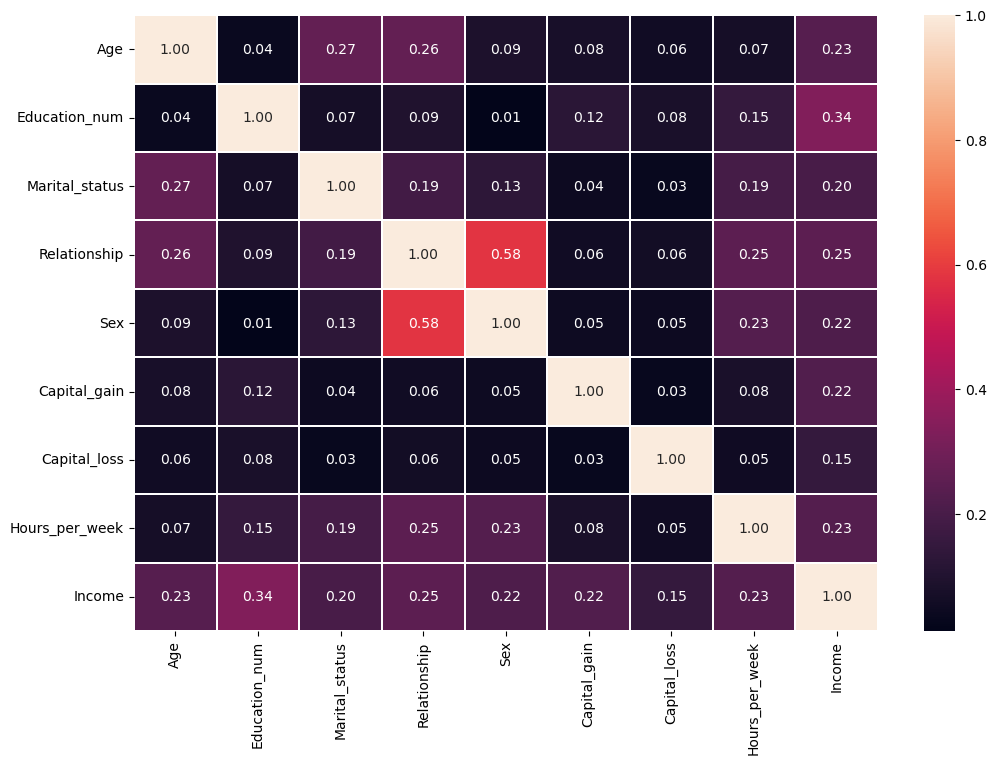

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = dt.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(dt_corr, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

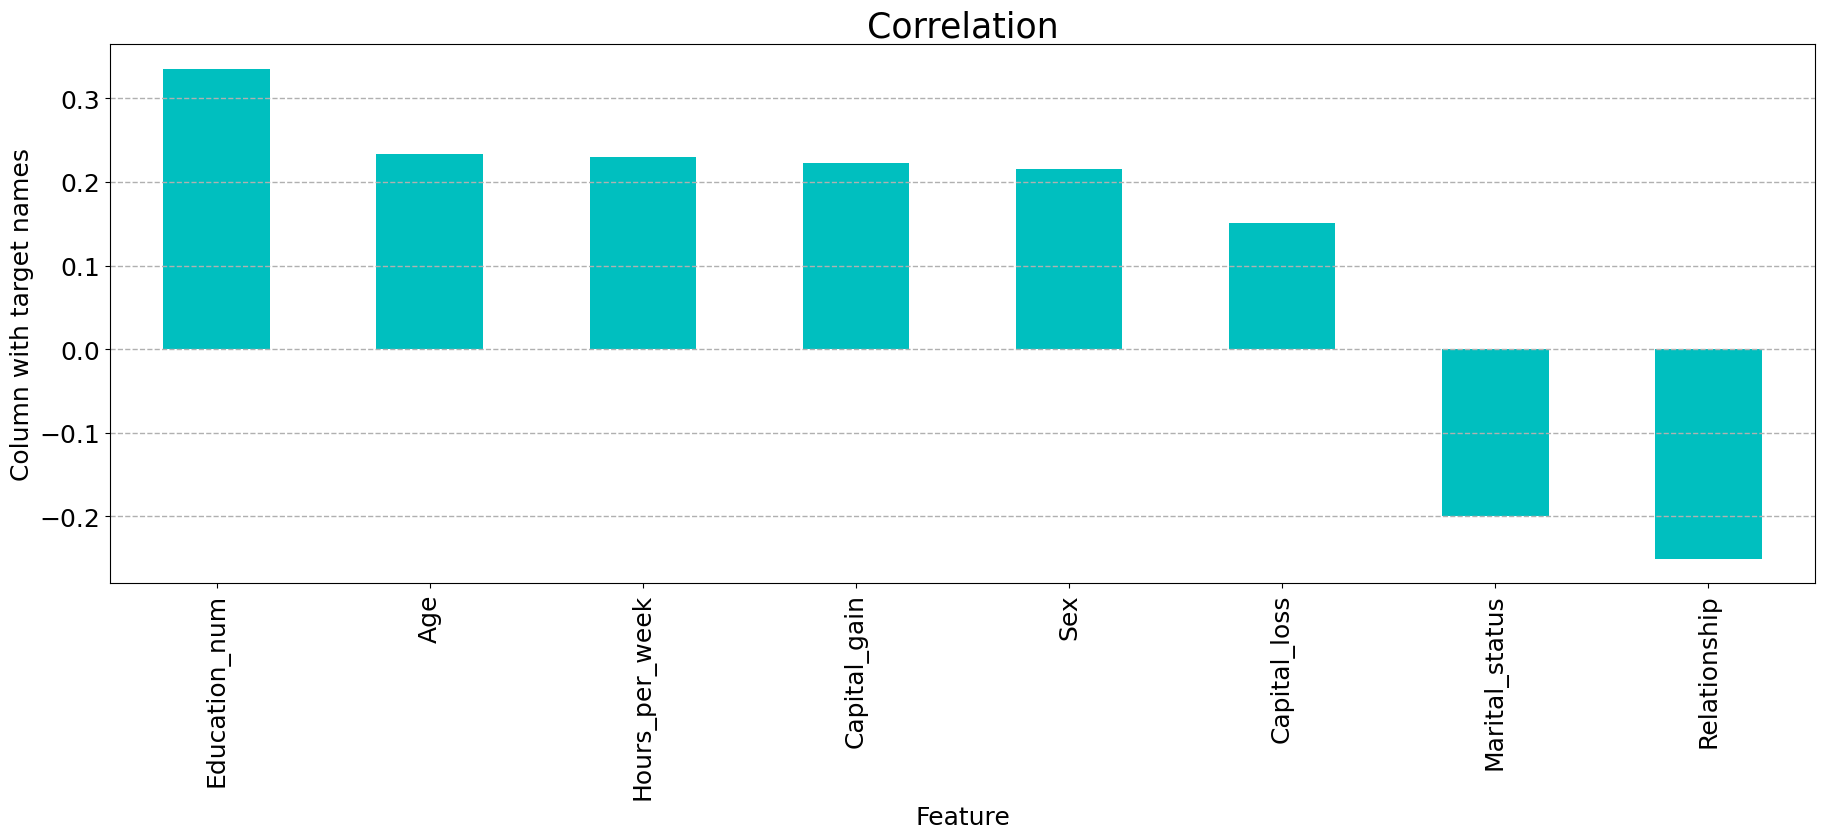

In [49]:
plt.figure(figsize=(22,7))
dt.corr()['Income'].sort_values (ascending=False).drop(['Income']). plot (kind='bar', color='c', fontsize=18)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Column with target names', fontsize=18)
plt.title('Correlation', fontsize=25)

plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1, which='both')

plt.show()

##### 'Sex' & 'Relationship' columns are co-related. But, because column 'Relationship' is contributing more to column 'Income', more than column 'Sex', therefore dropping 'Sex' column.

In [50]:
dt.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [51]:
dt = dt.drop(columns=['Sex'])
dt.head()

,Age,Education_num,Marital_status,Relationship,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,13,2,0,0,0,13,0
1,38,9,0,1,0,0,40,0
2,53,7,2,0,0,0,40,0
3,28,13,2,5,0,0,40,0
4,37,14,2,5,0,0,40,0


# 

# 

## Removing Outliners

In [52]:
dt.describe()

,Age,Education_num,Marital_status,Relationship,Capital_gain,Capital_loss,Hours_per_week,Income
count,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,10.081725,2.611384,1.446552,1078.410069,87.370912,40.440343,0.240933
std,13.638193,2.571622,1.506304,1.607087,7388.068465,403.107737,12.347079,0.427656
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,2.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,2.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,4.000000,3.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,6.000000,5.000000,99999.000000,4356.000000,99.000000,1.000000


### Finding columns with Continuous data

In [53]:
df.dtypes

Age                int64
Workclass         object
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [54]:
dt.dtypes

Age               int64
Education_num     int64
Marital_status    int32
Relationship      int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Income            int64
dtype: object

### Checking Outliners in Continuous columns

In [55]:
con_columns = df.select_dtypes(include=['int64','int32']).copy()
con_columns.columns

Index(['Age', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [56]:
common_columns1 = dt.columns.intersection(con_columns.columns)
df1 = dt[common_columns1].copy()
df1.columns

Index(['Age', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

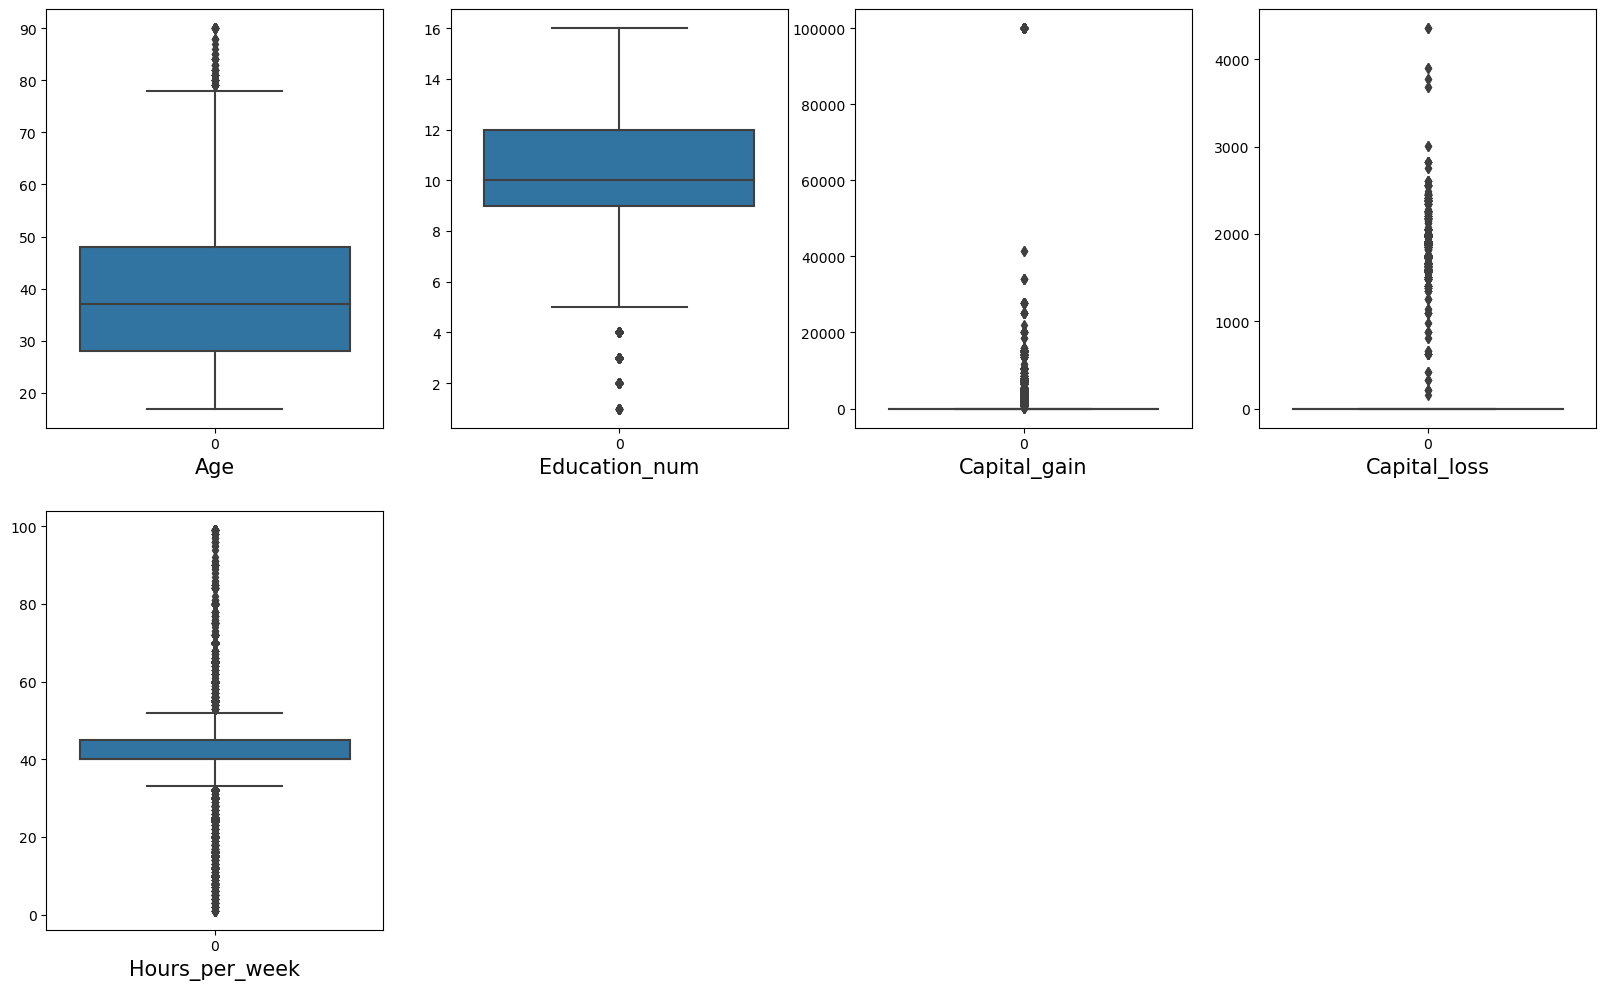

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df1: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df1[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

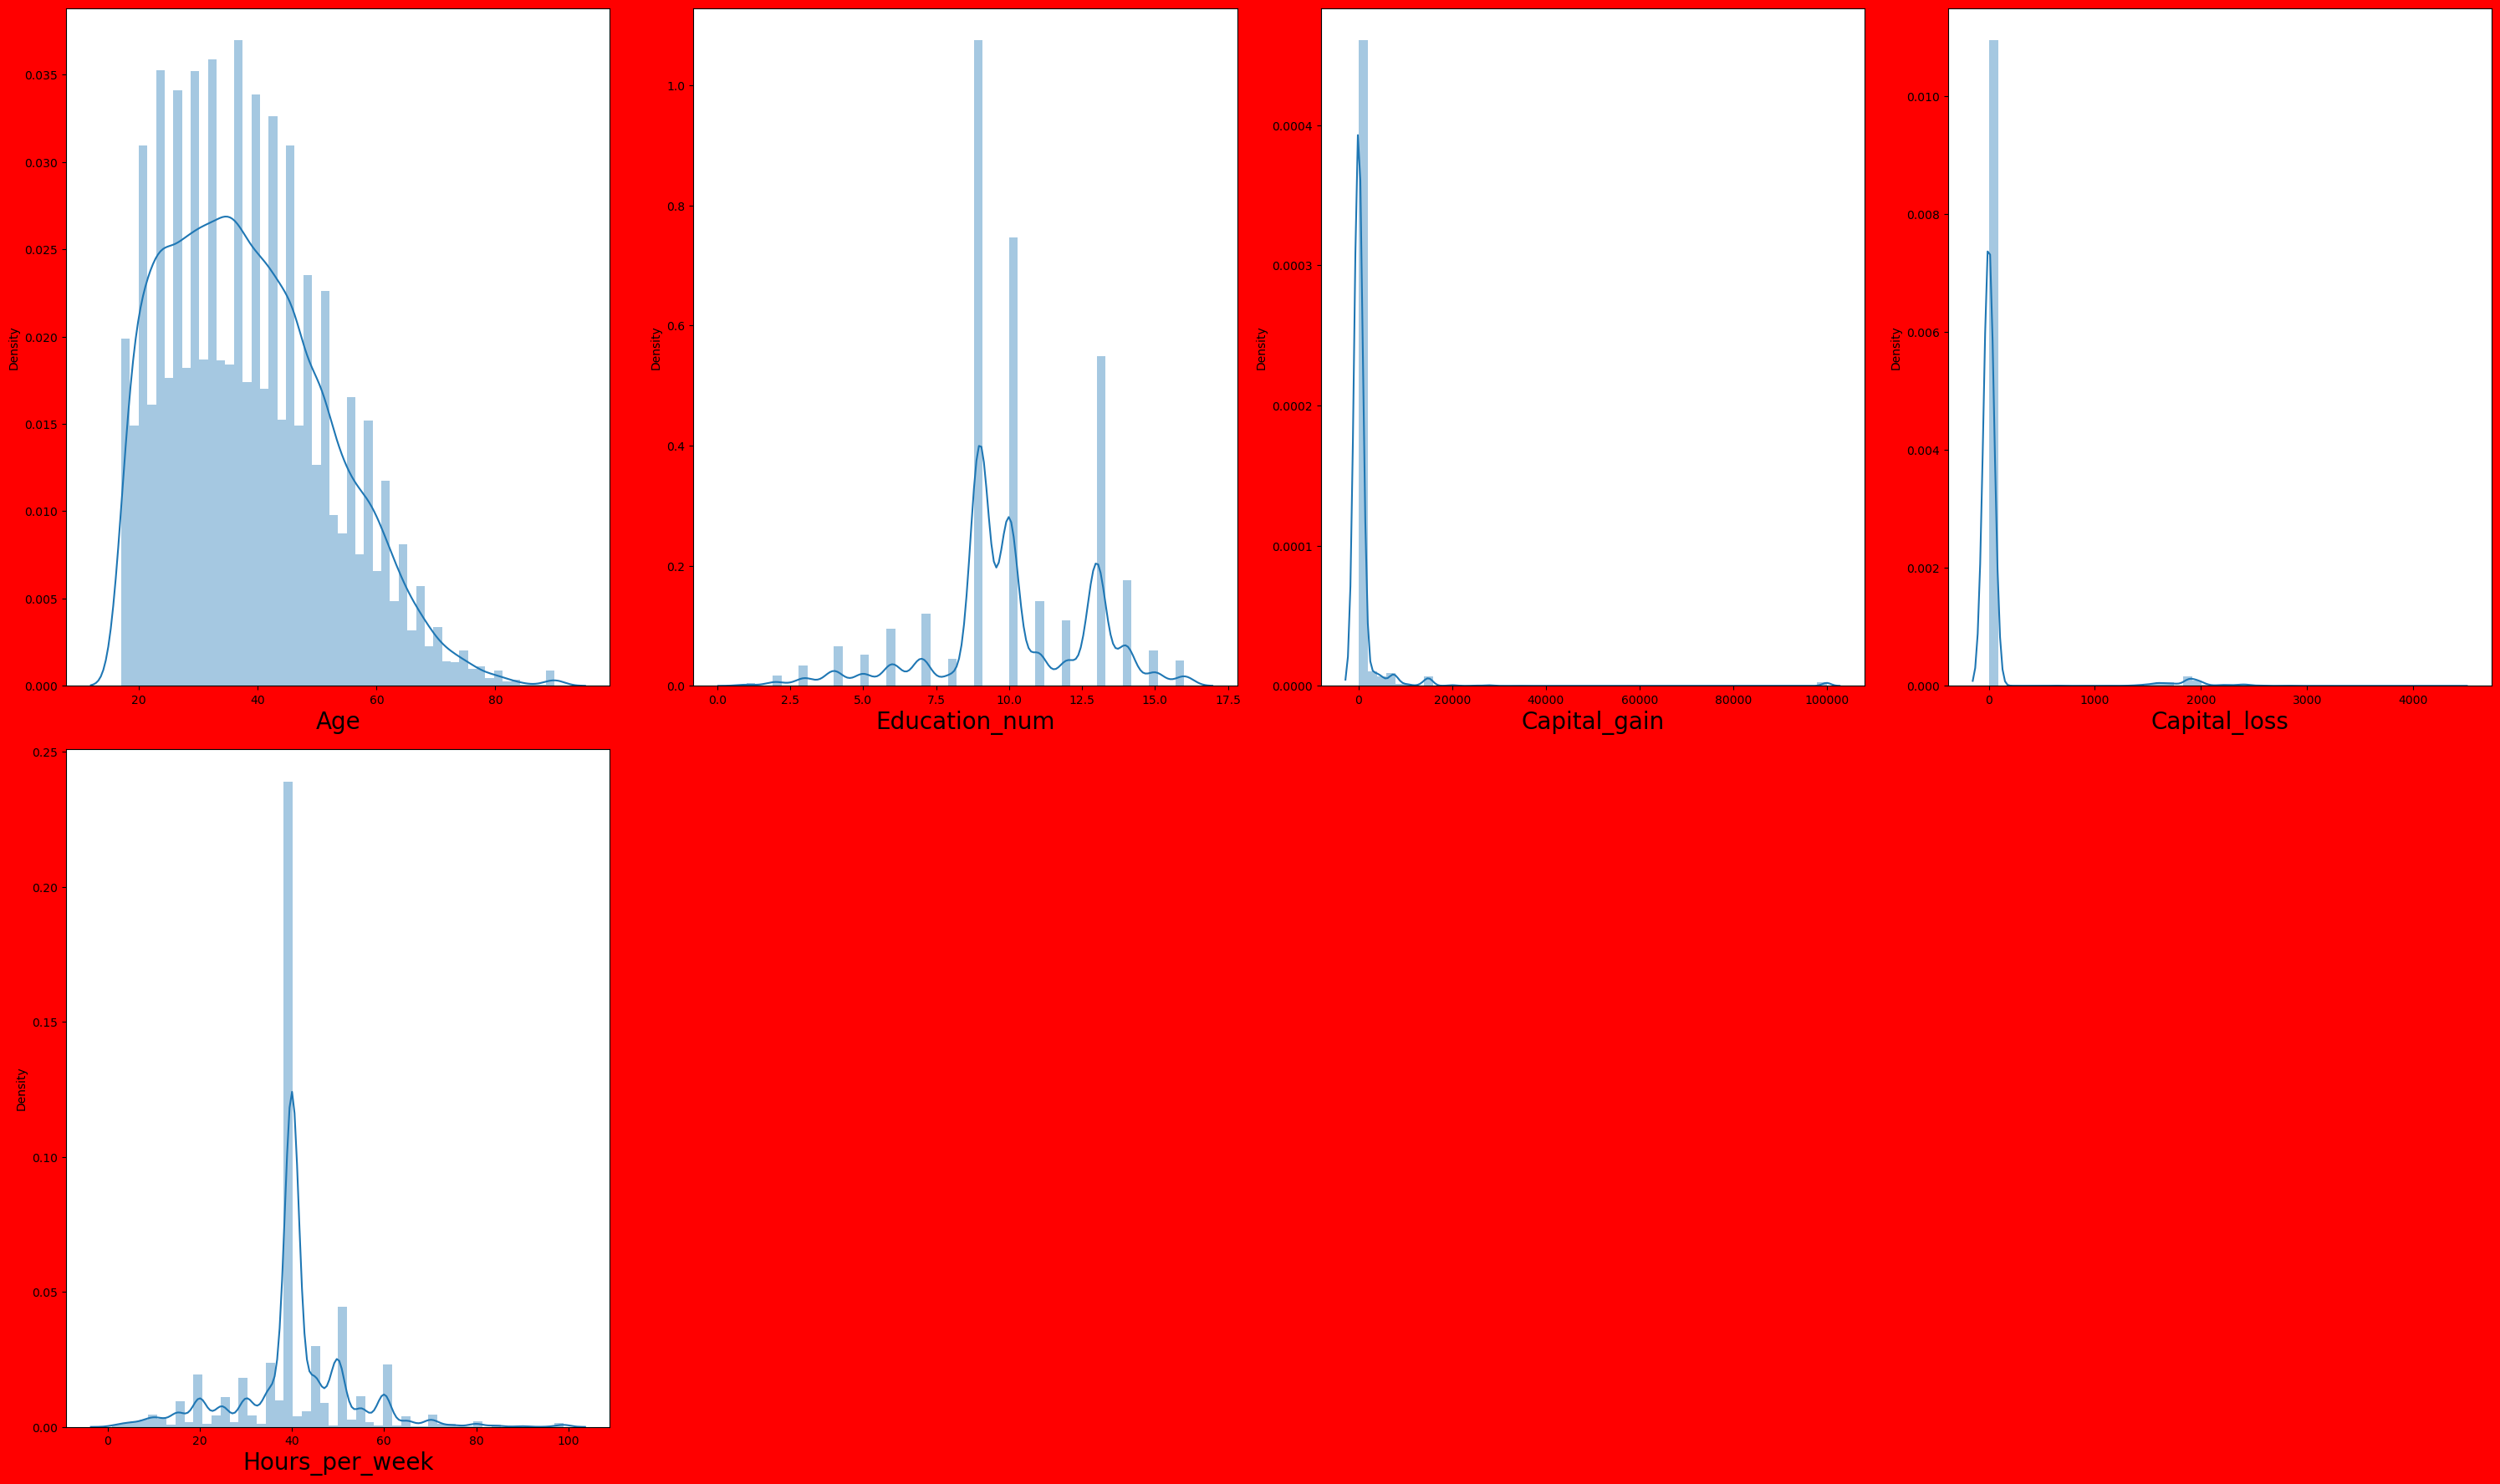

In [58]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df1:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df1[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

##### If we look the data & graph carefully, majority of data in columns 'Capital_gain' & 'Capital_loss' is 0 [More than 75% of data is 0]. Therefore they have huge number of outliners, so it is better to drop these columns.

### Dropping columns with huge irrelevant data

In [59]:
dt.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [60]:
dt = dt.drop(columns=['Capital_gain', 'Capital_loss'])
dt.head()

,Age,Education_num,Marital_status,Relationship,Hours_per_week,Income
0,50,13,2,0,13,0
1,38,9,0,1,40,0
2,53,7,2,0,40,0
3,28,13,2,5,40,0
4,37,14,2,5,40,0


### Checking Outliners in Continuous columns again

In [61]:
dt.describe()

,Age,Education_num,Marital_status,Relationship,Hours_per_week,Income
count,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,10.081725,2.611384,1.446552,40.440343,0.240933
std,13.638193,2.571622,1.506304,1.607087,12.347079,0.427656
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,2.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,2.000000,1.000000,40.000000,0.000000
75%,48.000000,12.000000,4.000000,3.000000,45.000000,0.000000
max,90.000000,16.000000,6.000000,5.000000,99.000000,1.000000


In [62]:
con_columns.columns

Index(['Age', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [63]:
dt.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship',
       'Hours_per_week', 'Income'],
      dtype='object')

In [64]:
common_columns2 = dt.columns.intersection(con_columns.columns)
df2 = dt[common_columns2].copy()
df2.columns

Index(['Age', 'Education_num', 'Hours_per_week'], dtype='object')

In [65]:
from scipy.stats import zscore 

z_score = zscore(df2)
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
dt = dt[filtering_entry]

dt.describe()

,Age,Education_num,Marital_status,Relationship,Hours_per_week,Income
count,31082.000000,31082.000000,31082.000000,31082.000000,31082.000000,31082.000000
mean,38.088283,10.214047,2.600991,1.456020,40.285085,0.244675
std,13.050621,2.373460,1.502521,1.609593,10.718328,0.429901
min,17.000000,4.000000,0.000000,0.000000,8.000000,0.000000
25%,27.000000,9.000000,2.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,2.000000,1.000000,40.000000,0.000000
75%,47.000000,13.000000,4.000000,3.000000,45.000000,0.000000
max,75.000000,16.000000,6.000000,5.000000,73.000000,1.000000


In [66]:
dt.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship',
       'Hours_per_week', 'Income'],
      dtype='object')

In [67]:
dt.shape

(31082, 6)

# 

# 

## Removing Skewness

### Finding columns with Continuous values

In [68]:
con_columns.columns

Index(['Age', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [69]:
dt.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship',
       'Hours_per_week', 'Income'],
      dtype='object')

In [70]:
common_columns3 = dt.columns.intersection(con_columns.columns)
df3 = dt[common_columns3].copy()
df3.columns

Index(['Age', 'Education_num', 'Hours_per_week'], dtype='object')

#### 'Age', 'Education_num' & 'Hours_per_week' have Continuous values

### Checking Skewness

In [71]:
dt.skew()

Age               0.432453
Education_num     0.009406
Marital_status   -0.037688
Relationship      0.773209
Hours_per_week   -0.287333
Income            1.187905
dtype: float64

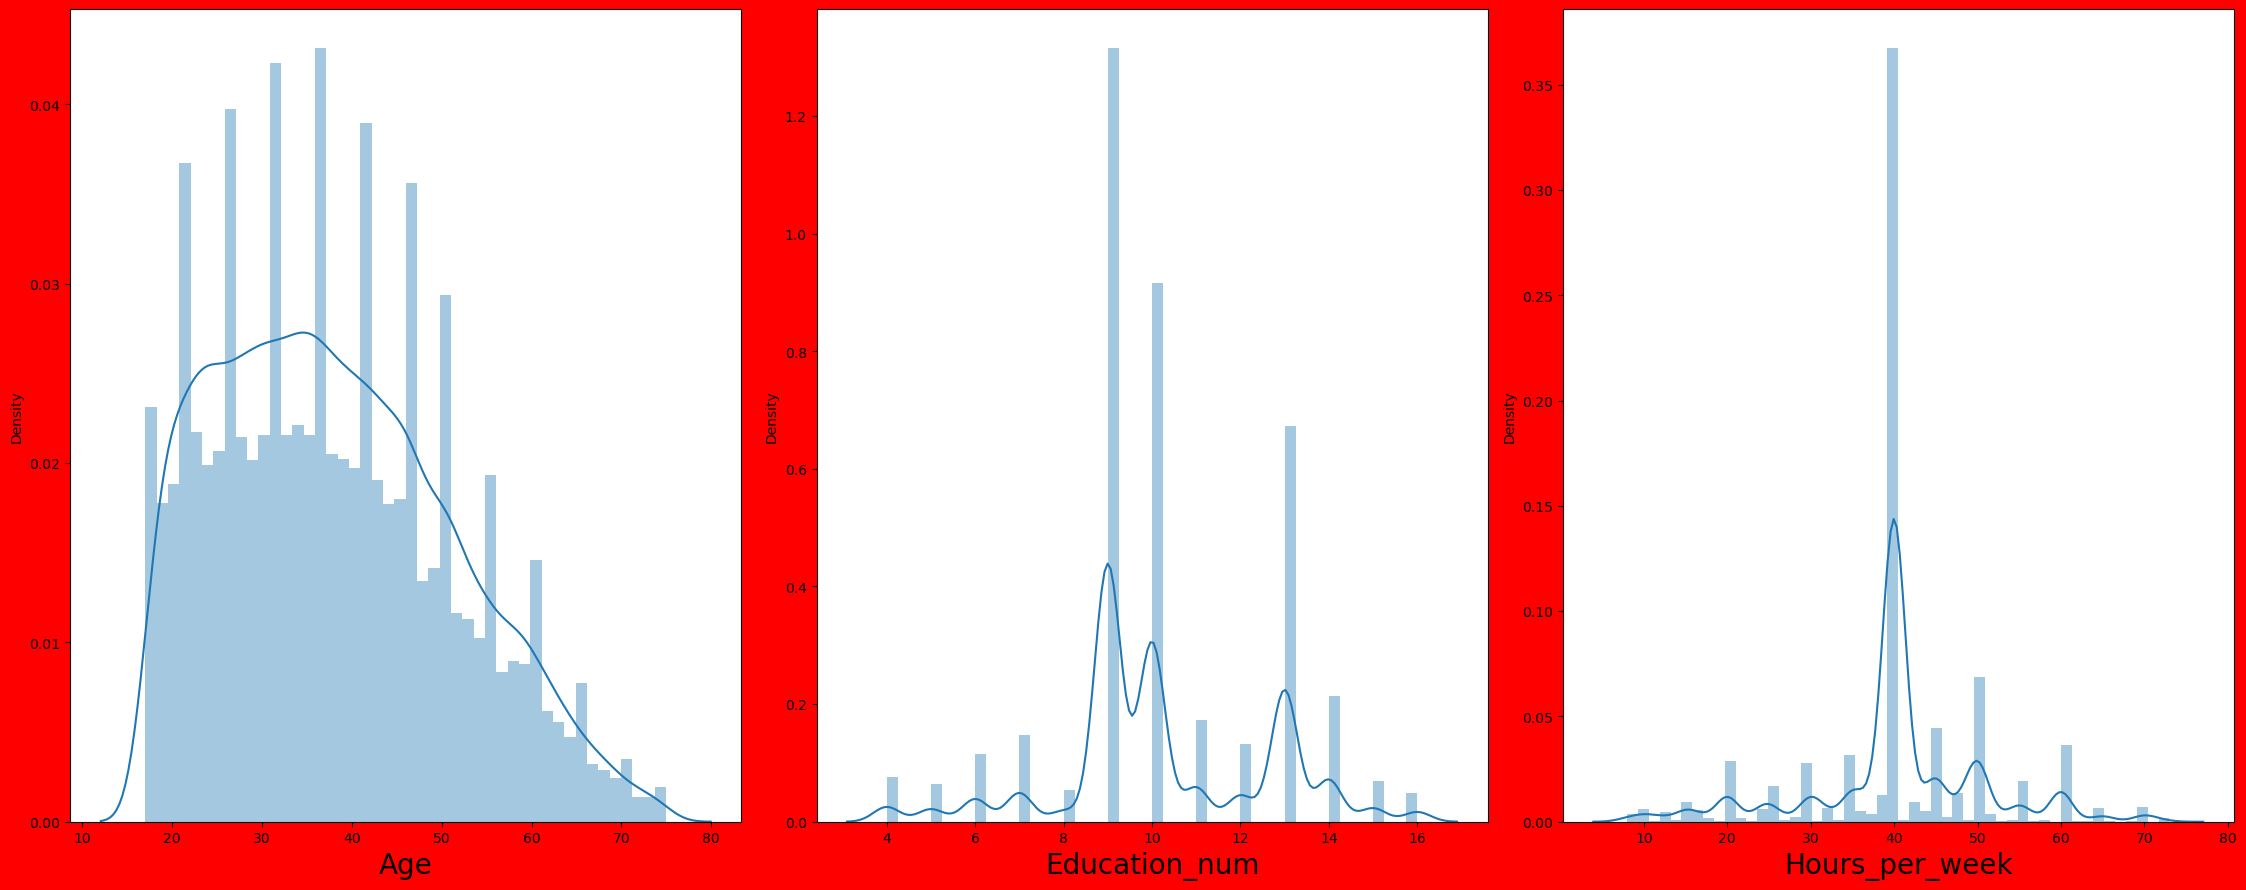

In [72]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df3:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(dt[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

##### No high skewness found

# 

# 

## Checking Distribution

In [73]:
x = dt.drop(columns = ['Income'])
y = dt['Income']

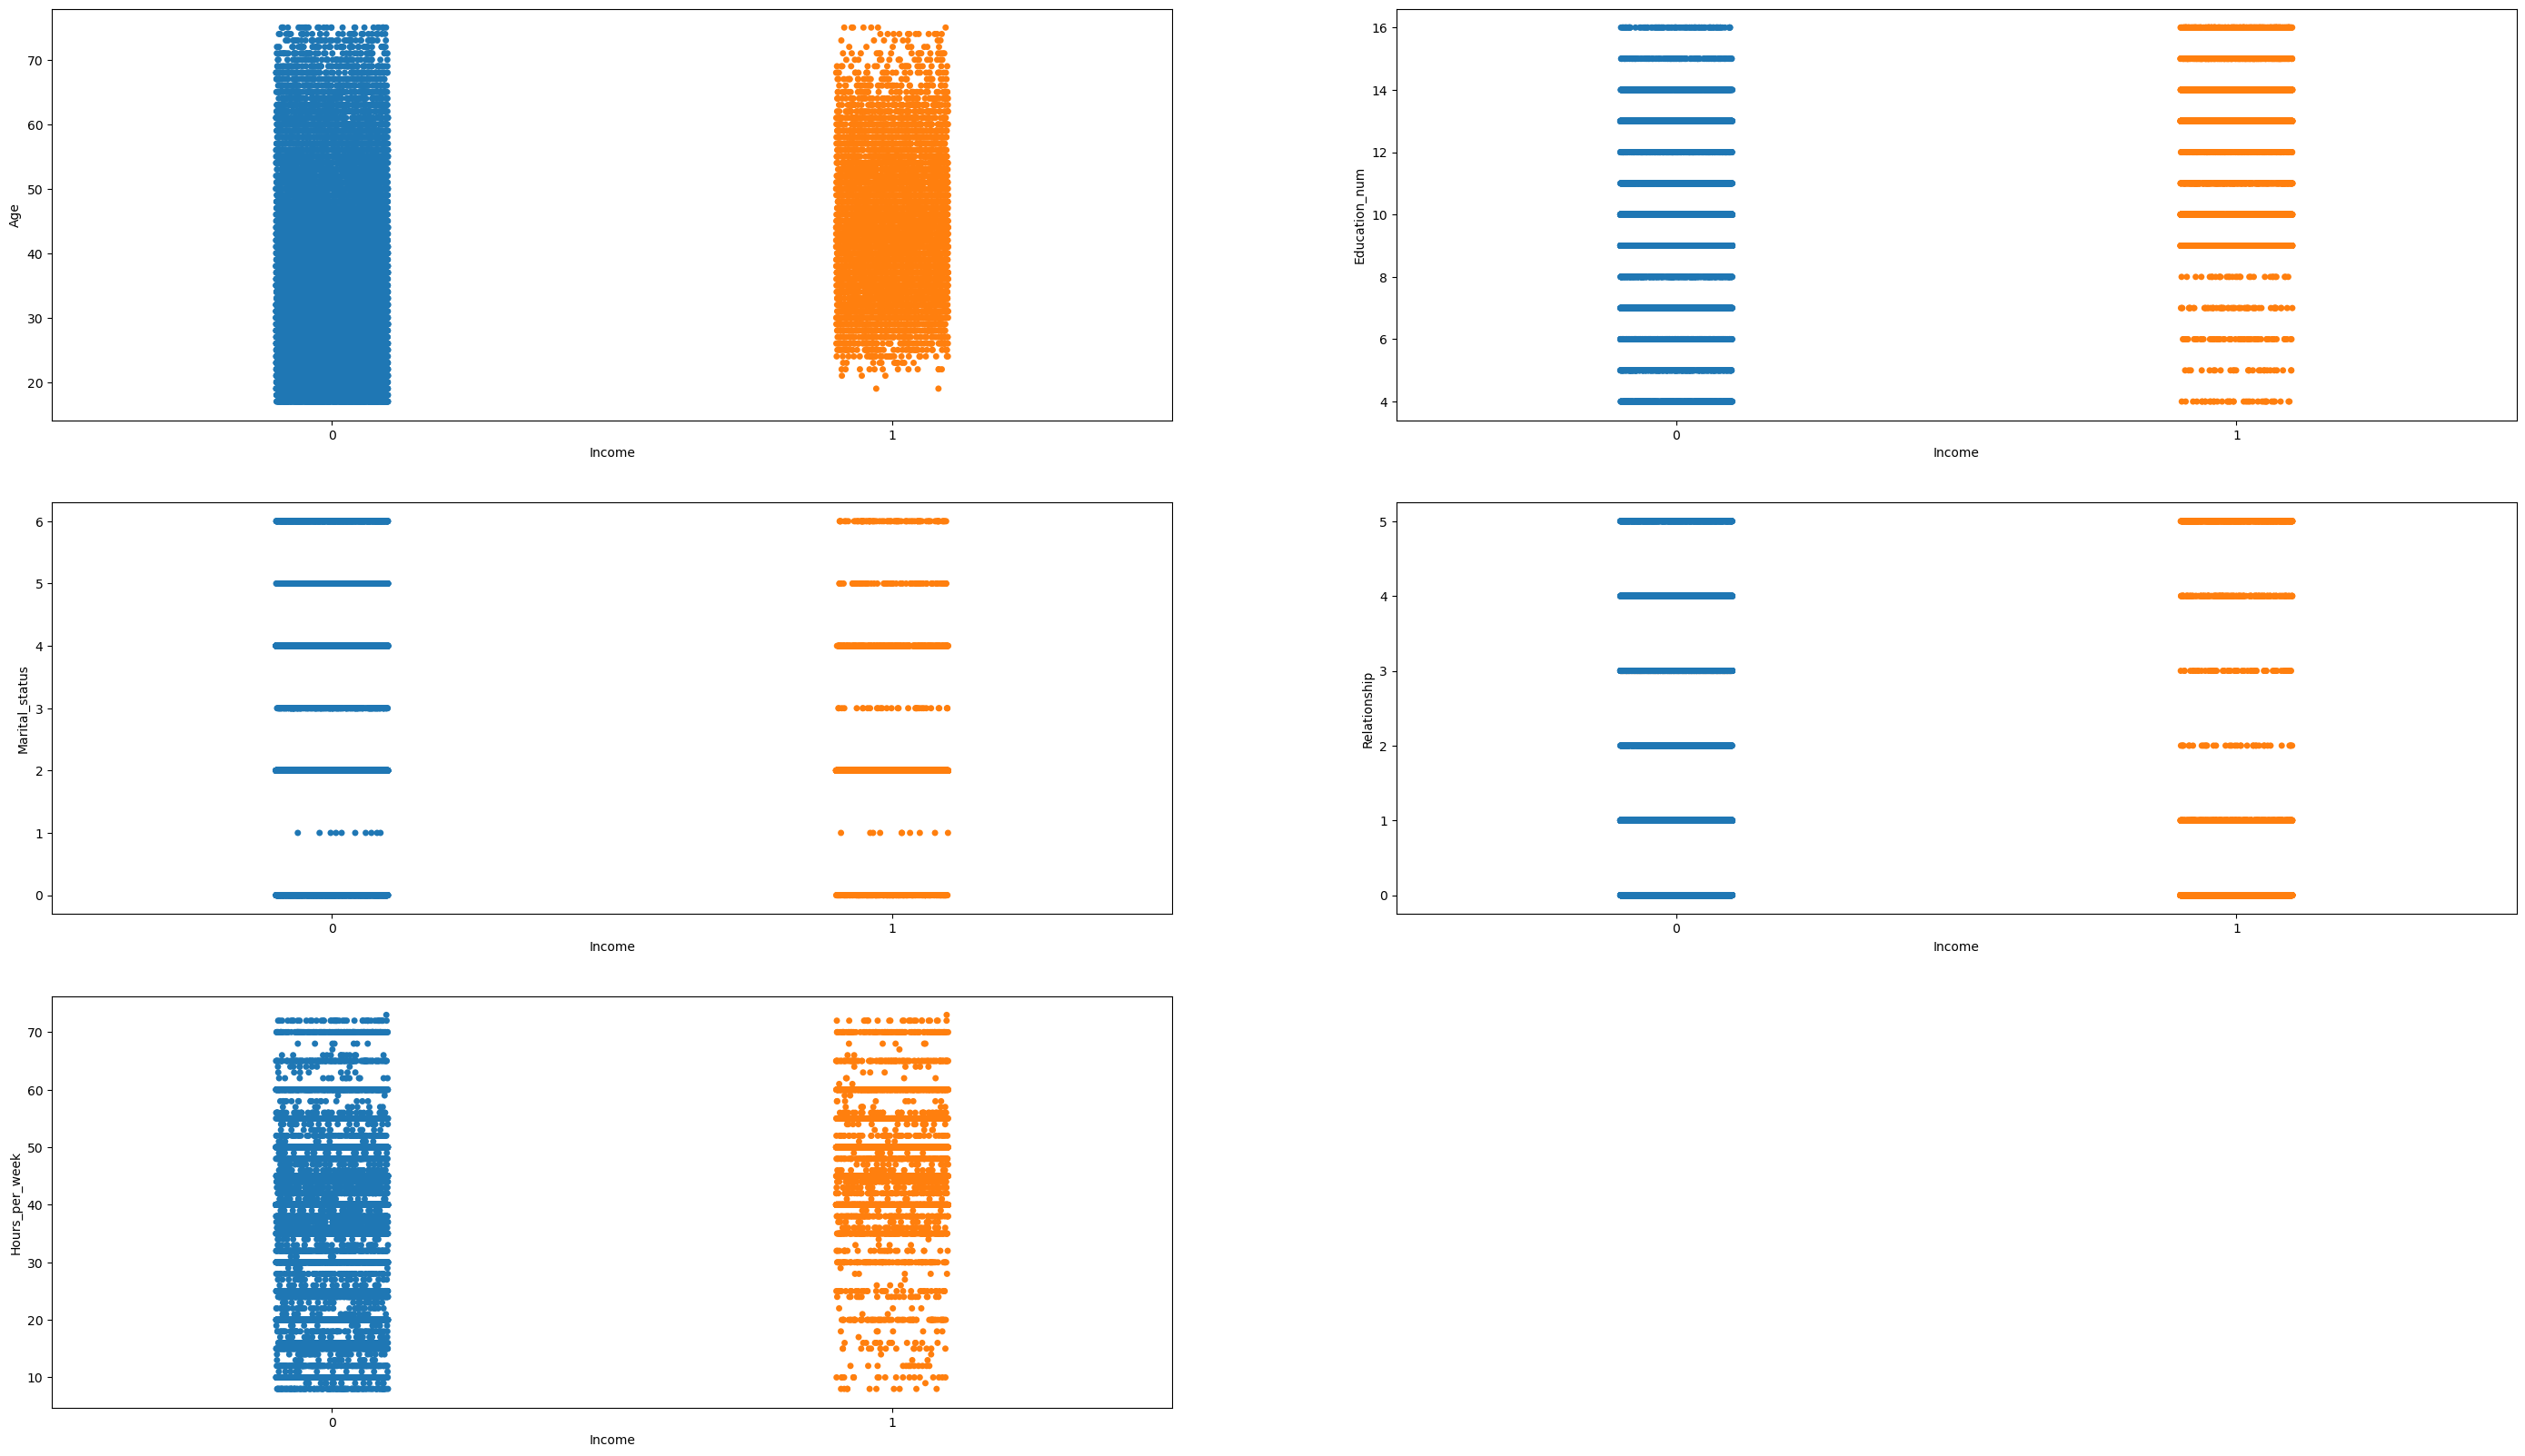

In [74]:
plt.figure(figsize=(35,20))
plotnumber = 1

for column in x:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

#  

## Oversampling

In [75]:
dt["Income"].unique()

array([0, 1], dtype=int64)

In [76]:
dt["Income"].value_counts()

0    23477
1     7605
Name: Income, dtype: int64

In [77]:
x = dt.drop(['Income'],axis=1)
y = dt['Income']

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
upsample = SMOTE()

In [80]:
x, y = upsample.fit_resample(x,y)

In [81]:
from collections import Counter
count = Counter(y)
print(count)

Counter({0: 23477, 1: 23477})


# 

## Standardization

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

## Train-Test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

In [86]:
x_train.shape

(35215, 5)

In [87]:
x_test.shape

(11739, 5)

# 

## Importing important Metrices

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

# 

## DecisionTreeClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'best'}

In [91]:
cls_dt = DecisionTreeClassifier(criterion='entropy',max_features=None, min_samples_leaf=7, min_samples_split=2,max_depth=8)

In [92]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7)

In [93]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8139997160301008


In [94]:
y_pred = cls_dt.predict(x_test)

In [95]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8107164153675782


In [96]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4554, 1315],
       [ 907, 4963]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

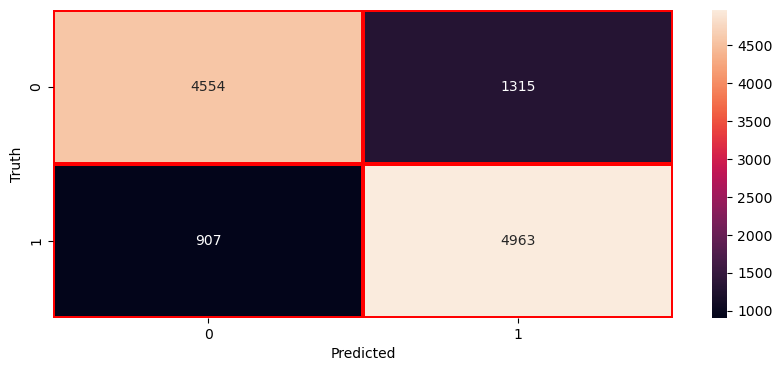

In [97]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      5869
           1       0.79      0.85      0.82      5870

    accuracy                           0.81     11739
   macro avg       0.81      0.81      0.81     11739
weighted avg       0.81      0.81      0.81     11739



### Cross-validation

In [99]:
from sklearn.model_selection import KFold, cross_val_score

In [100]:
c5=cross_val_score (cls_dt, x_train, y_train, cv=5)
c5

array([0.80122107, 0.80761039, 0.81101803, 0.80775238, 0.81087605])

In [101]:
c5.mean()

0.8076955842680675

In [102]:
c6=cross_val_score(cls_dt, x_test, y_test, cv=5)
c6

array([0.79386712, 0.80962521, 0.80238501, 0.80494037, 0.79164891])

In [103]:
c6.mean()

0.8004933261425474

### ROC Curve

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [105]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84548552 1.        ]
False Positive rate =  [0.         0.22405861 1.        ]


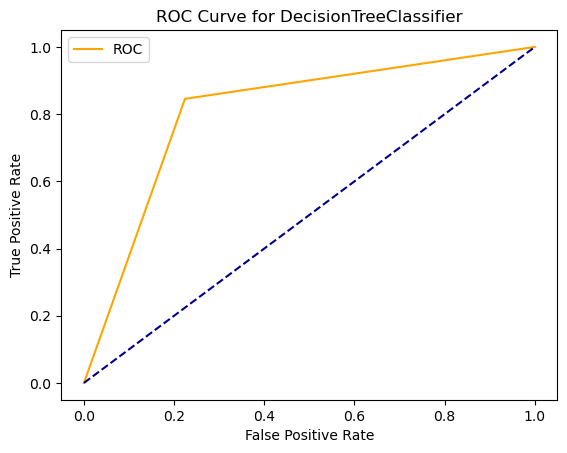

In [106]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

In [107]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8107134532697571

# 

## BaggingClassifier with DecisionTreeClassifier

In [108]:
from sklearn.ensemble import BaggingClassifier

In [109]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_features=None, min_samples_leaf=7, min_samples_split=2,max_depth=8))

In [110]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=8,
                                                        min_samples_leaf=7))

In [111]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.816981399971603


In [112]:
y_pred = bag1.predict(x_test)

In [113]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8147201635573729


In [114]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4557, 1312],
       [ 863, 5007]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

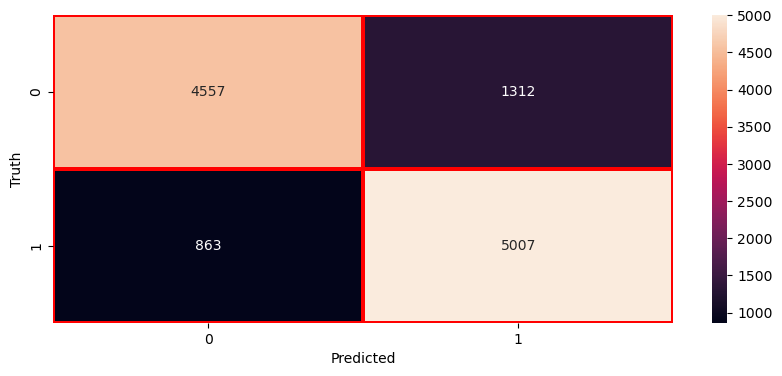

In [115]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      5869
           1       0.79      0.85      0.82      5870

    accuracy                           0.81     11739
   macro avg       0.82      0.81      0.81     11739
weighted avg       0.82      0.81      0.81     11739



### Cross-validation

In [117]:
from sklearn.model_selection import KFold, cross_val_score

In [118]:
c7=cross_val_score (bag1, x_train, y_train, cv=5)
c7

array([0.80647451, 0.80988215, 0.80931421, 0.81045009, 0.81272185])

In [119]:
c7.mean()

0.8097685645321595

In [120]:
c8=cross_val_score (bag1, x_test, y_test, cv=5)
c8

array([0.8028109 , 0.81345826, 0.81005111, 0.82112436, 0.79676182])

In [121]:
c8.mean()

0.8088412914670873

### ROC Curve

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [123]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.85298126 1.        ]
False Positive rate =  [0.         0.22354745 1.        ]


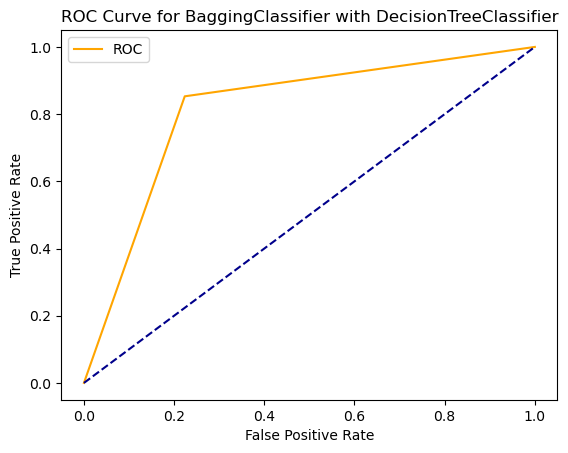

In [124]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BaggingClassifier with DecisionTreeClassifier')
plt.legend()
plt.show()

In [125]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8147169039648452

# 

## KNeighbors Classifier

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree'],
              'metric': ['str', 'callable', 'minkowski'],
              'leaf_size': range(0, 10, 2),
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 8,
 'metric': 'minkowski',
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [128]:
cls_KN = KNeighborsClassifier(n_neighbors=19, leaf_size=40, p = 1, algorithm='auto', weights = 'uniform')

In [129]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=40, n_neighbors=19, p=1)

In [130]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.8252449240380519


In [131]:
y_pred = cls_KN.predict(x_test)

In [132]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8159979555328393


In [133]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4515, 1354],
       [ 806, 5064]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

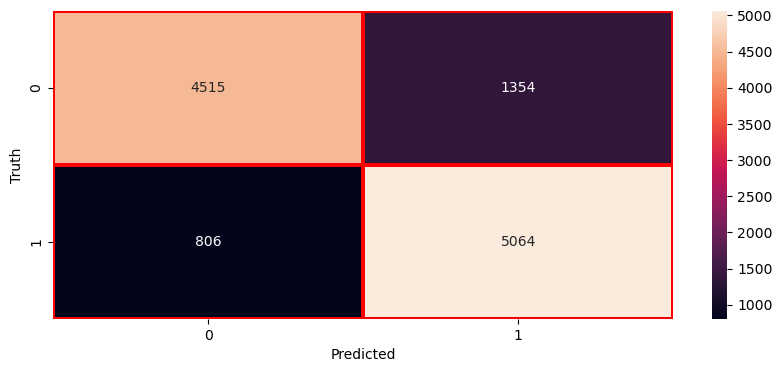

In [134]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      5869
           1       0.79      0.86      0.82      5870

    accuracy                           0.82     11739
   macro avg       0.82      0.82      0.82     11739
weighted avg       0.82      0.82      0.82     11739



### Cross-validation

In [136]:
from sklearn.model_selection import KFold, cross_val_score

In [137]:
c13=cross_val_score (cls_KN, x_train, y_train, cv=15)
c13

array([0.80536627, 0.80962521, 0.8181431 , 0.80664395, 0.82367973,
       0.80792164, 0.8032368 , 0.82112436, 0.81601363, 0.80749574,
       0.81508308, 0.81380486, 0.81423093, 0.81210055, 0.80869195])

In [138]:
c13.mean()

0.8122107868079563

In [139]:
c14=cross_val_score (cls_KN, x_test, y_test, cv=15)
c14

array([0.77650064, 0.82120051, 0.81353768, 0.81992337, 0.79310345,
       0.8109834 , 0.80076628, 0.81992337, 0.8045977 , 0.80051151,
       0.81074169, 0.81074169, 0.79283887, 0.81713555, 0.79411765])

In [140]:
c14.mean()

0.8057748903326115

### ROC Curve

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [142]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.86269165 1.        ]
False Positive rate =  [0.        0.2307037 1.       ]


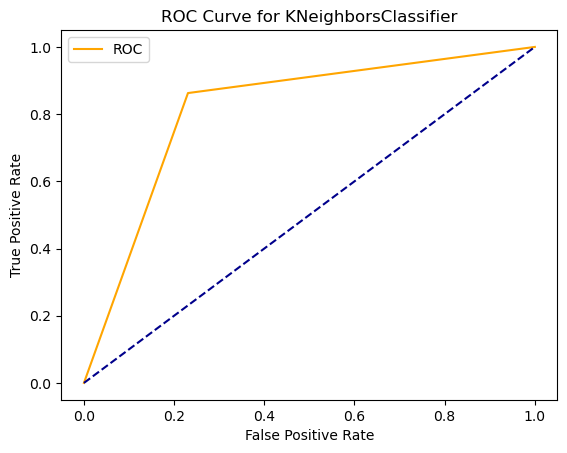

In [143]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

In [144]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8159939775385526

# 

## GradientBoostingClassifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
cls_gb = GradientBoostingClassifier(n_estimators=16,learning_rate=1,max_depth=3)

In [147]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=16)

In [148]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8138009371006674


In [149]:
y_pred = cls_gb.predict(x_test)

In [150]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8131016270551155


In [151]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4568, 1301],
       [ 893, 4977]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

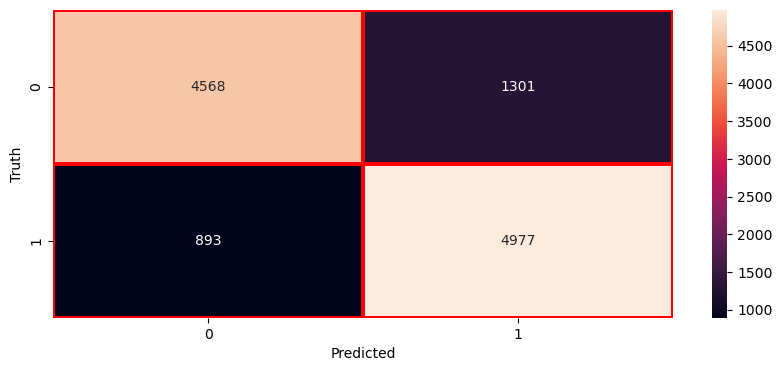

In [152]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      5869
           1       0.79      0.85      0.82      5870

    accuracy                           0.81     11739
   macro avg       0.81      0.81      0.81     11739
weighted avg       0.81      0.81      0.81     11739



### Cross-validation

In [154]:
from sklearn.model_selection import KFold, cross_val_score

In [155]:
c17=cross_val_score (cls_gb, x_train, y_train, cv=5)
c17

array([0.80178901, 0.81059208, 0.81499361, 0.80874627, 0.811302  ])

In [156]:
c17.mean()

0.8094845946329687

In [157]:
c18=cross_val_score (cls_gb, x_test, y_test, cv=5)
c18

array([0.80068143, 0.81388416, 0.81473595, 0.81856899, 0.79633575])

In [158]:
c18.mean()

0.8088412551744261

### ROC Curve

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [160]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84787053 1.        ]
False Positive rate =  [0.        0.2216732 1.       ]


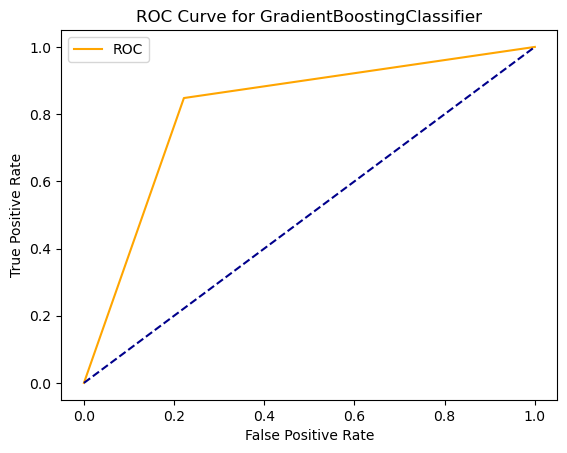

In [161]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

In [162]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.813098664974603

# 

## Adaboosting

In [163]:
from sklearn import metrics

In [164]:
from sklearn.ensemble import AdaBoostClassifier

In [165]:
param_grid = {"base_estimator__max_depth" : [2, 5], 
              "n_estimators": [200, 400, 600]}

tree = DecisionTreeClassifier (random_state=1)

ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

folds = 3

grid_search_ABC = GridSearchCV(ABC,
                               cv = folds,
                               param_grid=param_grid,
                               scoring = 'roc_auc',
                               return_train_score=True,
                               verbose = 1)

grid_search_ABC.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(random_state=1),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [166]:
tree = DecisionTreeClassifier(max_depth=2, random_state=1)

ABC = AdaBoostClassifier(base_estimator=tree, learning_rate=0.6,
                         n_estimators=200, algorithm="SAMME", random_state=1)
ABC.fit(x_train, y_train)

predictions = ABC.predict_proba(x_test)
predictions[:10]

array([[0.45982652, 0.54017348],
       [0.5230698 , 0.4769302 ],
       [0.4671808 , 0.5328192 ],
       [0.42538357, 0.57461643],
       [0.51442459, 0.48557541],
       [0.48727168, 0.51272832],
       [0.40220637, 0.59779363],
       [0.49600046, 0.50399954],
       [0.60394337, 0.39605663],
       [0.71575277, 0.28424723]])

In [167]:
print('Accuracy Score:',ABC.score(x_train, y_train))

Accuracy Score: 0.8038051966491552


In [168]:
y_predicted_labels = np.argmax(predictions, axis=1)
y_predicted_labels

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [169]:
print('Accuracy Score:',accuracy_score (y_test,y_predicted_labels))

Accuracy Score: 0.8090978788653207


In [170]:
conf_mat = confusion_matrix(y_test,y_predicted_labels)
conf_mat

array([[4521, 1348],
       [ 893, 4977]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

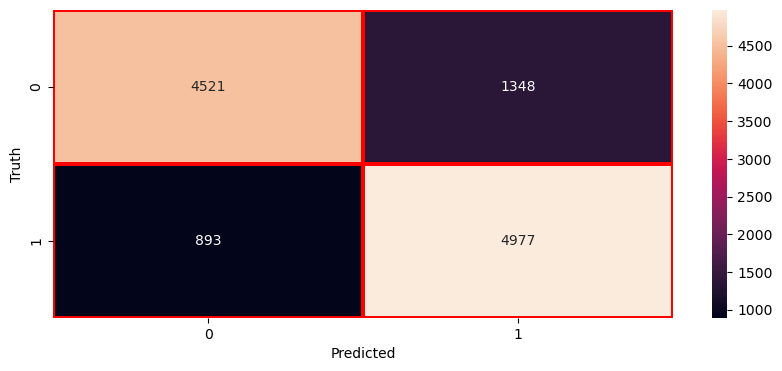

In [171]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [172]:
print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      5869
           1       0.79      0.85      0.82      5870

    accuracy                           0.81     11739
   macro avg       0.81      0.81      0.81     11739
weighted avg       0.81      0.81      0.81     11739



### Cross-validation

In [173]:
from sklearn.model_selection import KFold, cross_val_score

In [174]:
c23=cross_val_score (ABC, x_train, y_train, cv=5)
c23

array([0.80107909, 0.80462871, 0.80590657, 0.80306687, 0.80590657])

In [175]:
c23.mean()

0.8041175635382649

In [176]:
c24=cross_val_score (ABC, x_test, y_test, cv=5)
c24

array([0.80706985, 0.81388416, 0.81601363, 0.81473595, 0.80187473])

In [177]:
c24.mean()

0.8107156622430752

### ROC Curve

In [178]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_labels)

In [179]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.84787053 1.        ]
False Positive rate =  [0.         0.22968138 1.        ]


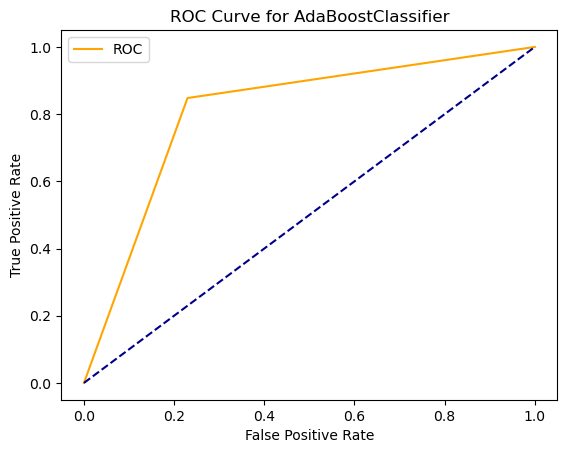

In [180]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoostClassifier')
plt.legend()
plt.show()

In [181]:
metrics.roc_auc_score(y_test, predictions[:,1])

0.8856761031527939

# 

## Cat Boost Classifier

In [182]:
features = list(dt.columns)

In [183]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(task_type='CPU', iterations=100, 
                              random_state = 2021, 
                              eval_metric="F1")

In [184]:
model_cb.fit(x_train, y_train, cat_features= None, plot=True, 
             eval_set=(x_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.207946
0:	learn: 0.8014749	test: 0.8027375	best: 0.8027375 (0)	total: 158ms	remaining: 15.6s
1:	learn: 0.8123163	test: 0.8155024	best: 0.8155024 (1)	total: 163ms	remaining: 7.97s
2:	learn: 0.8120521	test: 0.8168404	best: 0.8168404 (2)	total: 168ms	remaining: 5.43s
3:	learn: 0.8137765	test: 0.8176080	best: 0.8176080 (3)	total: 173ms	remaining: 4.16s
4:	learn: 0.8141308	test: 0.8181745	best: 0.8181745 (4)	total: 179ms	remaining: 3.39s
5:	learn: 0.8149219	test: 0.8195477	best: 0.8195477 (5)	total: 184ms	remaining: 2.89s
6:	learn: 0.8174519	test: 0.8211017	best: 0.8211017 (6)	total: 190ms	remaining: 2.53s
7:	learn: 0.8170849	test: 0.8211494	best: 0.8211494 (7)	total: 196ms	remaining: 2.26s
8:	learn: 0.8171928	test: 0.8216842	best: 0.8216842 (8)	total: 201ms	remaining: 2.03s
9:	learn: 0.8157809	test: 0.8179962	best: 0.8216842 (8)	total: 206ms	remaining: 1.86s
10:	learn: 0.8155655	test: 0.8173061	best: 0.8216842 (8)	total: 212ms	remaining: 1.71s
11:	learn: 0.8160718	te

In [185]:
predictions = model_cb.predict_proba(x_test)
predictions[:10]

array([[0.24089376, 0.75910624],
       [0.61319699, 0.38680301],
       [0.30914647, 0.69085353],
       [0.1507117 , 0.8492883 ],
       [0.56537923, 0.43462077],
       [0.24977365, 0.75022635],
       [0.09873306, 0.90126694],
       [0.5652276 , 0.4347724 ],
       [0.94130549, 0.05869451],
       [0.9951882 , 0.0048118 ]])

In [186]:
y_predicted_labels = np.argmax(predictions, axis=1)
y_predicted_labels

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [187]:
print('Accuracy Score:',model_cb.score(x_train, y_train))

Accuracy Score: 0.8186000283969899


In [188]:
print('Accuracy Score:',accuracy_score (y_test,y_predicted_labels))

Accuracy Score: 0.8184683533520742


In [189]:
conf_mat = confusion_matrix(y_test,y_predicted_labels)
conf_mat

array([[4541, 1328],
       [ 803, 5067]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

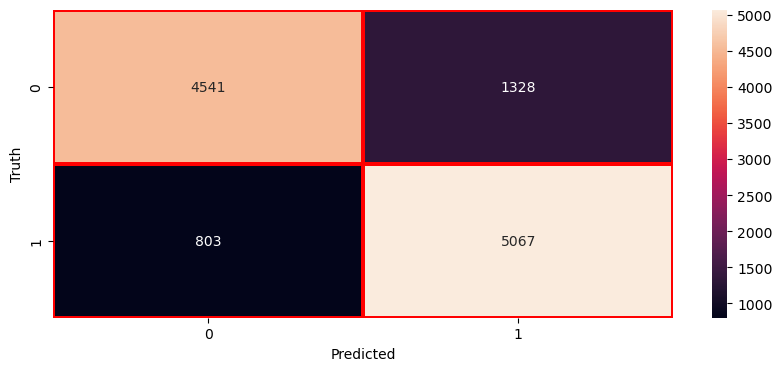

In [190]:
import seaborn as sn
plt.figure(figsize = (10,4))
sns.heatmap(conf_mat, annot=True, linewidths=1.5,linecolor="red", fmt= '.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [191]:
print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      5869
           1       0.79      0.86      0.83      5870

    accuracy                           0.82     11739
   macro avg       0.82      0.82      0.82     11739
weighted avg       0.82      0.82      0.82     11739



### Cross-validation

In [192]:
from sklearn.model_selection import KFold, cross_val_score

In [193]:
c31=cross_val_score(model_cb, x_train, y_train, cv=5)
c31

Learning rate set to 0.354002
0:	learn: 0.8031965	total: 4.11ms	remaining: 407ms
1:	learn: 0.8115342	total: 7.52ms	remaining: 369ms
2:	learn: 0.8153496	total: 11.2ms	remaining: 362ms
3:	learn: 0.8137392	total: 16.1ms	remaining: 386ms
4:	learn: 0.8158001	total: 19.9ms	remaining: 378ms
5:	learn: 0.8173995	total: 23.6ms	remaining: 369ms
6:	learn: 0.8157806	total: 27.1ms	remaining: 359ms
7:	learn: 0.8192512	total: 32.3ms	remaining: 372ms
8:	learn: 0.8192121	total: 36.5ms	remaining: 369ms
9:	learn: 0.8199468	total: 41.3ms	remaining: 371ms
10:	learn: 0.8203296	total: 45.8ms	remaining: 370ms
11:	learn: 0.8203349	total: 49.5ms	remaining: 363ms
12:	learn: 0.8202277	total: 53.2ms	remaining: 356ms
13:	learn: 0.8204126	total: 56.6ms	remaining: 348ms
14:	learn: 0.8204351	total: 60.9ms	remaining: 345ms
15:	learn: 0.8211604	total: 64.7ms	remaining: 340ms
16:	learn: 0.8211322	total: 68.2ms	remaining: 333ms
17:	learn: 0.8214852	total: 71.9ms	remaining: 328ms
18:	learn: 0.8220867	total: 75.3ms	remaining

76:	learn: 0.8313273	total: 315ms	remaining: 94.2ms
77:	learn: 0.8314349	total: 320ms	remaining: 90.2ms
78:	learn: 0.8315871	total: 324ms	remaining: 86.2ms
79:	learn: 0.8315531	total: 328ms	remaining: 82.1ms
80:	learn: 0.8322048	total: 333ms	remaining: 78.1ms
81:	learn: 0.8325191	total: 338ms	remaining: 74.1ms
82:	learn: 0.8326649	total: 341ms	remaining: 69.9ms
83:	learn: 0.8327100	total: 345ms	remaining: 65.7ms
84:	learn: 0.8321645	total: 349ms	remaining: 61.5ms
85:	learn: 0.8324962	total: 353ms	remaining: 57.4ms
86:	learn: 0.8318990	total: 356ms	remaining: 53.2ms
87:	learn: 0.8321813	total: 360ms	remaining: 49.1ms
88:	learn: 0.8321291	total: 364ms	remaining: 44.9ms
89:	learn: 0.8325688	total: 367ms	remaining: 40.8ms
90:	learn: 0.8327995	total: 371ms	remaining: 36.7ms
91:	learn: 0.8328161	total: 374ms	remaining: 32.6ms
92:	learn: 0.8328610	total: 378ms	remaining: 28.5ms
93:	learn: 0.8332659	total: 383ms	remaining: 24.4ms
94:	learn: 0.8332940	total: 387ms	remaining: 20.3ms
95:	learn: 0

51:	learn: 0.8269037	total: 192ms	remaining: 178ms
52:	learn: 0.8269730	total: 197ms	remaining: 175ms
53:	learn: 0.8267780	total: 201ms	remaining: 172ms
54:	learn: 0.8268803	total: 210ms	remaining: 172ms
55:	learn: 0.8270105	total: 214ms	remaining: 168ms
56:	learn: 0.8268758	total: 218ms	remaining: 164ms
57:	learn: 0.8277253	total: 221ms	remaining: 160ms
58:	learn: 0.8278920	total: 225ms	remaining: 157ms
59:	learn: 0.8281051	total: 230ms	remaining: 153ms
60:	learn: 0.8283853	total: 233ms	remaining: 149ms
61:	learn: 0.8283018	total: 237ms	remaining: 145ms
62:	learn: 0.8285396	total: 241ms	remaining: 141ms
63:	learn: 0.8279679	total: 245ms	remaining: 138ms
64:	learn: 0.8280354	total: 249ms	remaining: 134ms
65:	learn: 0.8287487	total: 253ms	remaining: 130ms
66:	learn: 0.8289837	total: 256ms	remaining: 126ms
67:	learn: 0.8290907	total: 261ms	remaining: 123ms
68:	learn: 0.8290791	total: 264ms	remaining: 119ms
69:	learn: 0.8293719	total: 268ms	remaining: 115ms
70:	learn: 0.8294114	total: 272

array([0.81215391, 0.81385773, 0.81669743, 0.81598751, 0.81683942])

In [194]:
c31.mean()

0.8151071986369445

In [195]:
c32=cross_val_score(model_cb, x_test, y_test, cv=5)
c32

Learning rate set to 0.221453
0:	learn: 0.8044891	total: 2.54ms	remaining: 252ms
1:	learn: 0.8098492	total: 4.88ms	remaining: 239ms
2:	learn: 0.8172659	total: 8.25ms	remaining: 267ms
3:	learn: 0.8179153	total: 10.5ms	remaining: 253ms
4:	learn: 0.8192771	total: 13ms	remaining: 247ms
5:	learn: 0.8169643	total: 15.1ms	remaining: 237ms
6:	learn: 0.8200828	total: 17.3ms	remaining: 230ms
7:	learn: 0.8213280	total: 19.8ms	remaining: 228ms
8:	learn: 0.8204459	total: 22.1ms	remaining: 223ms
9:	learn: 0.8216445	total: 24.1ms	remaining: 217ms
10:	learn: 0.8215515	total: 26.3ms	remaining: 213ms
11:	learn: 0.8211275	total: 28.5ms	remaining: 209ms
12:	learn: 0.8220434	total: 30.7ms	remaining: 205ms
13:	learn: 0.8224147	total: 33.1ms	remaining: 203ms
14:	learn: 0.8227411	total: 35.4ms	remaining: 200ms
15:	learn: 0.8239830	total: 37.5ms	remaining: 197ms
16:	learn: 0.8232553	total: 40.1ms	remaining: 196ms
17:	learn: 0.8229918	total: 42.3ms	remaining: 193ms
18:	learn: 0.8230035	total: 44.6ms	remaining: 

69:	learn: 0.8255483	total: 151ms	remaining: 64.8ms
70:	learn: 0.8255838	total: 154ms	remaining: 62.8ms
71:	learn: 0.8255129	total: 157ms	remaining: 60.9ms
72:	learn: 0.8257160	total: 159ms	remaining: 58.8ms
73:	learn: 0.8257160	total: 161ms	remaining: 56.5ms
74:	learn: 0.8258353	total: 163ms	remaining: 54.4ms
75:	learn: 0.8259545	total: 166ms	remaining: 52.3ms
76:	learn: 0.8256676	total: 168ms	remaining: 50.3ms
77:	learn: 0.8258575	total: 171ms	remaining: 48.2ms
78:	learn: 0.8258929	total: 174ms	remaining: 46.1ms
79:	learn: 0.8259898	total: 176ms	remaining: 44ms
80:	learn: 0.8259413	total: 179ms	remaining: 41.9ms
81:	learn: 0.8260252	total: 181ms	remaining: 39.7ms
82:	learn: 0.8261090	total: 182ms	remaining: 37.4ms
83:	learn: 0.8268236	total: 185ms	remaining: 35.2ms
84:	learn: 0.8266207	total: 187ms	remaining: 33.1ms
85:	learn: 0.8265368	total: 189ms	remaining: 30.8ms
86:	learn: 0.8260958	total: 191ms	remaining: 28.6ms
87:	learn: 0.8263120	total: 193ms	remaining: 26.3ms
88:	learn: 0.8

70:	learn: 0.8302994	total: 148ms	remaining: 60.6ms
71:	learn: 0.8302994	total: 151ms	remaining: 58.9ms
72:	learn: 0.8303147	total: 153ms	remaining: 56.8ms
73:	learn: 0.8310059	total: 155ms	remaining: 54.6ms
74:	learn: 0.8310059	total: 157ms	remaining: 52.5ms
75:	learn: 0.8308035	total: 159ms	remaining: 50.3ms
76:	learn: 0.8314948	total: 161ms	remaining: 48.2ms
77:	learn: 0.8313265	total: 164ms	remaining: 46.2ms
78:	learn: 0.8318835	total: 166ms	remaining: 44ms
79:	learn: 0.8319515	total: 168ms	remaining: 41.9ms
80:	learn: 0.8319854	total: 170ms	remaining: 39.8ms
81:	learn: 0.8317993	total: 172ms	remaining: 37.7ms
82:	learn: 0.8319175	total: 174ms	remaining: 35.6ms
83:	learn: 0.8320016	total: 176ms	remaining: 33.5ms
84:	learn: 0.8322881	total: 178ms	remaining: 31.5ms
85:	learn: 0.8322039	total: 181ms	remaining: 29.5ms
86:	learn: 0.8321360	total: 185ms	remaining: 27.6ms
87:	learn: 0.8321700	total: 187ms	remaining: 25.4ms
88:	learn: 0.8326588	total: 189ms	remaining: 23.3ms
89:	learn: 0.8

array([0.80664395, 0.81516184, 0.81516184, 0.8181431 , 0.80230081])

In [196]:
c32.mean()

0.8114823084164859

### ROC Curve

In [197]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_labels)

In [198]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.86320273 1.        ]
False Positive rate =  [0.         0.22627364 1.        ]


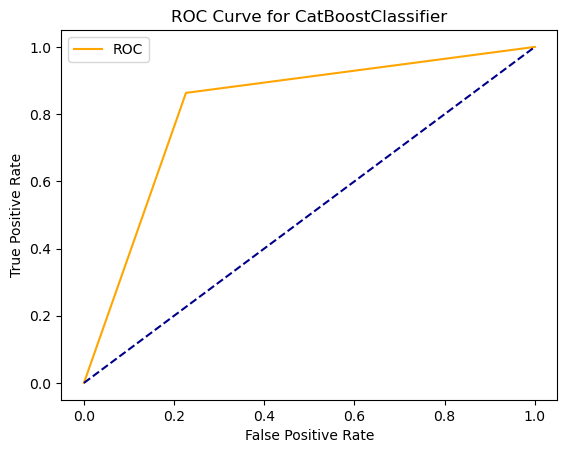

In [199]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoostClassifier')
plt.legend()
plt.show()

In [200]:
metrics.roc_auc_score(y_test, predictions[:, 1])

0.8952205347706585

# 

# 

## Plotting ROC Curve for all models

In [201]:
from sklearn.metrics import plot_roc_curve

#### On Training Data

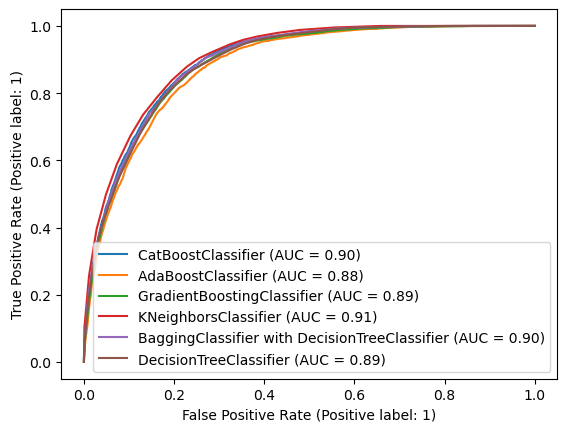

In [202]:
disp = plot_roc_curve (model_cb, x_train, y_train)

plot_roc_curve (ABC, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_gb, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_KN, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag1, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with DecisionTreeClassifier')
plot_roc_curve (cls_dt, x_train, y_train, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

#### On Testing Data

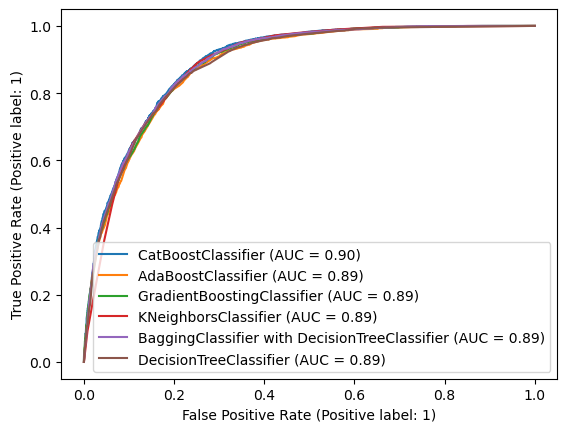

In [203]:
disp = plot_roc_curve (model_cb, x_test, y_test)

plot_roc_curve (ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_KN, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag1, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with DecisionTreeClassifier')
plot_roc_curve (cls_dt, x_test, y_test, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

# 

# 

## Saving the Top 3 Best Models

In [204]:
import pickle 

In [205]:
with open('bag1', 'wb') as f: 
    pickle.dump(bag1, f)

In [206]:
with open('cls_KN', 'wb') as f: 
    pickle.dump(cls_KN, f)

In [207]:
with open('cls_gb', 'wb') as f: 
    pickle.dump(cls_gb, f)

# 

## Opening the Saved Models

In [208]:
with open('bag1', 'rb') as f:
    l1 = pickle.load(f)

In [209]:
with open('cls_KN', 'rb') as f:
    l2 = pickle.load(f)

In [210]:
with open('cls_gb', 'rb') as f:
    l3 = pickle.load(f)

# 

## Predicting using Saved models

In [211]:
l1.predict(scaler.transform([[37,14,2,5,40]]))

array([1], dtype=int64)

In [212]:
l2.predict(scaler.transform([[37,14,2,5,40]]))

array([1], dtype=int64)

In [213]:
l3.predict(scaler.transform([[37,14,2,5,40]]))

array([1], dtype=int64)

# 

# 